# Working with NWB in Python

**Important**: This notebook will only work with the 2.10.0 version of the h5py package. The cell below will ensure that you have this version installed. If not, you should run the `!pip install` line.

In [24]:
# This will ensure that the correct version of the h5py package is installed
try:
    import h5py
    if h5py.__version__ == '2.10.0':
         print('h5py version ' + h5py.__version__ + ' already installed')
    else:
        print('h5py installed with an older version. some features may not work.')
except ImportError as e:
    !pip install h5py == '2.10.0'

h5py version 2.10.0 already installed


In [12]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from pynwb import NWBHDF5IO

## Reading our NWB file

To access the data in our nwb file we must read the file. This is done in two steps:

- assign our file as an NWBHDF5IO object
- read our file

The first step is done using the NWBHDF5IO class to create our NWBHDF5IO object and map our file to HDF5 format. Once we have done this, we can use the read() method to return our nwb file. For more information on how to read NWB files, please visit the Reading data from an NWB file section from the NWB Basics Tutorial. For more information on the NWBHDF5IO class, please visit the original documentation.

In [13]:
# first read the file 
io = NWBHDF5IO('000006/sub-anm369962/sub-anm369962_ses-20170310.nwb', 'r')
nwb_file = io.read()
print(type(nwb_file))

<class 'pynwb.file.NWBFile'>


## File Hierarchy: Groups, Datasets, and Attributes¶

The NWB file is composed of various Groups, Datasets, and Attributes. The data/datasets and cooresponding meta-data are encapsulated within these Groups. The `fields` attribute returns a dictionary contiaining the metadata of the Groups of our nwb file. The dictionary keys are the various Groups within the file which we will use to access our datasets.

In [14]:
# Get the Groups for the nwb file 
nwb_fields = nwb_file.fields
print(nwb_fields.keys())

dict_keys(['acquisition', 'analysis', 'scratch', 'stimulus', 'stimulus_template', 'processing', 'devices', 'electrode_groups', 'imaging_planes', 'icephys_electrodes', 'ogen_sites', 'intervals', 'lab_meta_data', 'session_description', 'identifier', 'session_start_time', 'timestamps_reference_time', 'file_create_date', 'keywords', 'epoch_tags', 'electrodes', 'subject', 'trials', 'units', 'experiment_description', 'institution', 'experimenter', 'related_publications'])


Each NWB file will have information on where the experiment was conducted, what lab conducted the experiment, as well as a description of the experiment. This information can be accessed using `institution`, `lab`, and `experiment_description`, attributes on our nwb_file, respectively.

In [15]:
# Get Meta-Data from NWB file 
print('The experiment within this NWB file was conducted at {} in the lab of {}. The experiment is detailed as follows: {}'.format(nwb_file.institution, nwb_file.lab, nwb_file.experiment_description))

The experiment within this NWB file was conducted at Janelia Research Campus in the lab of None. The experiment is detailed as follows: Extracellular electrophysiology recordings performed on mouse anterior lateral motor cortex (ALM) in delay response task. Neural activity from two neuron populations, pyramidal track upper and lower, were characterized, in relation to movement execution.


We can access metadata from each group in our nwb_file with the following syntax: `nwb_file.group`. This is no different than executing a method and/or attribute. Below we will demonstrate some of the useful groups within an `NWBFile` object. 

The `acquisition` contains datasets of acquisition data, mainly `TimeSeries` objects belonging to this NWBFile. 

In [16]:
nwb_file.acquisition

{'lick_times': lick_times pynwb.behavior.BehavioralEvents at 0x140552318103000
 Fields:
   time_series: {
     lick_left_times <class 'pynwb.base.TimeSeries'>,
     lick_right_times <class 'pynwb.base.TimeSeries'>
   }}

In this file, the acquisition group contains two different dataets, `lick_left_times` and `lick_right_times` within `lick_times`. To access the actual data array of these datasets we must first subset our dataset of interest from the group. We can then use `data[:]` to return our actual data array.

In [17]:
# select our dataset of interest 
subgroup = 'lick_times'
dataset = 'lick_right_times'
lick_r_dataset = nwb_file.acquisition[subgroup][dataset]

# return first 10 values in data array 
lick_r_data_array = lick_r_dataset.data[:10]

print(lick_r_data_array)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The `intervals` group contains all time interval tables from the experiemnt. We can look at the description field in the metadata to understand what each dataset in the group contains.  

In [18]:
# example showing how to return meta data from groups in nwb file 
nwb_file.intervals

{'trials': trials pynwb.epoch.TimeIntervals at 0x140552318257976
 Fields:
   colnames: ['start_time' 'stop_time' 'type' 'response' 'stim_present' 'is_good'
  'cue_start_time' 'pole_in_time' 'pole_out_time']
   columns: (
     start_time <class 'hdmf.common.table.VectorData'>,
     stop_time <class 'hdmf.common.table.VectorData'>,
     type <class 'hdmf.common.table.VectorData'>,
     response <class 'hdmf.common.table.VectorData'>,
     stim_present <class 'hdmf.common.table.VectorData'>,
     is_good <class 'hdmf.common.table.VectorData'>,
     cue_start_time <class 'hdmf.common.table.VectorData'>,
     pole_in_time <class 'hdmf.common.table.VectorData'>,
     pole_out_time <class 'hdmf.common.table.VectorData'>
   )
   description: experimental trials
   id: id <class 'hdmf.common.table.ElementIdentifiers'>}

Within the intervals group is the `trials` dataset which is a `DynamicTable` contianing intervals from our experimental trials. Each column in `trials` is a `VectorData` object and the table can be assigned to a dataframe using `to_dataframe()`.

In [19]:
# Select the group of interest from the nwb file 
intervals = nwb_file.intervals

# Subset the dataset from the group and assign it as a dataframe
interval_trials_df = intervals['trials'].to_dataframe()
interval_trials_df.head()

,start_time,stop_time,type,response,stim_present,is_good,cue_start_time,pole_in_time,pole_out_time
id,,,,,,,,,
1,323.171,NaN,lick right,early lick,0,1,7.49698,3.93949,5.12748
2,329.570,NaN,lick right,early lick,0,1,11.81280,4.94181,5.94198
3,335.971,NaN,lick right,incorrect,0,1,6.62964,4.12915,5.12931
4,342.371,NaN,lick right,incorrect,0,1,6.41964,3.91915,4.91931
5,348.289,NaN,lick right,incorrect,0,1,12.66990,10.16930,11.16950


The `description` attribute provides a short description on each column of the dataframe.

In [20]:
# return the description of each col in our dataframe
for col in intervals['trials'].to_dataframe():
    print(col +':')
    print(intervals['trials'][col].description)
    print('\n')

start_time:
Start time of epoch, in seconds


stop_time:
Stop time of epoch, in seconds


type:



response:



stim_present:
is this a stim or no-stim trial


is_good:
good/bad status of trial (bad trials are not analyzed)


cue_start_time:
onset of response period


pole_in_time:
onset of sample period


pole_out_time:
onset of the delay period




The `units` group in our nwb_file contains all our unit metadata including of our neural spike data for scientific analysis. Much like the `intervals` group, `units` is also a `DynamicTable` that can be assigned to a dataframe.

The `electrodes` group contians metadata from the elctrodes used in the experimental trials. Also a `DynamicTable`, the data includes location of the electrodes, type of filtering, and the whats electrode group the electrode belongs to. 

In [21]:
# electrode positions 
electrodes = nwb_file.electrodes
electrodes_df = electrodes.to_dataframe()
electrodes_df.head()

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
1,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
2,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
3,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
4,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
5,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64


For an in depth explanation of all groups contained within an `NWBFile` object please visit the <a href = 'https://pynwb.readthedocs.io/en/stable/pynwb.file.html'> pynwb.file.NWBFile </a> section of the PyNWB documentation. 

## Possible Analyses

Now that we are familiar with the structure of an `NWBFile` as well as the groups encapsulated within it, we are ready to work with the data. 

The first group that we will look at is `units` becasue it contains information on our neural spikes. Let familiarize ourselves with our dataframe once again. 

In [26]:
units = nwb_file.units
units_df = units.to_dataframe()
units_df = units_df[units_df['quality']=='Fair']
units_df.head()

,depth,quality,cell_type,spike_times,electrodes
id,,,,,
2,665.0,Fair,unidentified,"[329.95417899999956, 330.01945899999953, 330.0...",x y z imp \ id ...
5,715.0,Fair,unidentified,"[331.09961899999956, 332.14505899999955, 333.3...",x y z imp \ id ...
6,715.0,Fair,unidentified,"[329.91129899999953, 329.92869899999954, 330.0...",x y z imp \ id ...
7,765.0,Fair,unidentified,"[330.26357899999954, 330.3849389999996, 330.60...",x y z imp \ id ...
10,815.0,Fair,unidentified,"[329.8969389999996, 329.94389899999953, 329.95...",x y z imp \ id ...


The `spike_times` column the times at which the recorded neuron fired. Each neuron has a list of spike times for their `spike_times` column. 

In [27]:
# return the first 10 spike times for neurons 2-8
neural_data = units_df['spike_times'][1:8][:10]
neural_data

id
5     [331.09961899999956, 332.14505899999955, 333.3...
6     [329.91129899999953, 329.92869899999954, 330.0...
7     [330.26357899999954, 330.3849389999996, 330.60...
10    [329.8969389999996, 329.94389899999953, 329.95...
11    [330.08321899999953, 331.0170989999996, 331.19...
14    [330.72441899999956, 330.83309899999955, 330.9...
20    [330.84521899999953, 332.47577899999953, 332.5...
Name: spike_times, dtype: object

A spike raster plot can be created using the funtion `plt.eventplot`. A spike raster plot displays the spiking of neurons overtime. In a spike raster plot, the y-axis corresponds to the neuron being recorded and the x-axis represents the time. Each horizontal line in the plot represents the spiking of a neuron. Spike raster plots are useful as they reveal firing rate correlations between groups of neurons. For more inormation on `plt.eventplot` please visit the <a href = 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.eventplot.html'> matplotlib documentation</a>. 

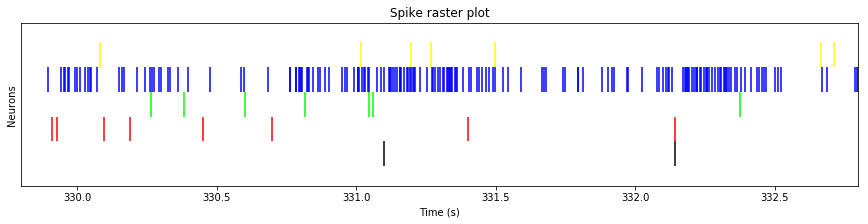

In [46]:
from matplotlib.widgets import Slider

# Set different colors for each neuron 
color_codes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1],
                        [1, 1, 0]])

def rasterPlot(units_df,neuron_start,neuron_end,start_time,end_time):

    fig, ax = plt.subplots(figsize=(15,3))

    neural_data = units_df['spike_times'][neuron_start:neuron_end]
    
    # Plot our raster plot 
    plt.eventplot(neural_data, color = color_codes)

    # Set our axis limits to only include points in our data
    plt.xlim([start_time,end_time])
    
    # Label our firgure 
    plt.title('Spike raster plot')
    plt.ylabel('Neurons')
    plt.xlabel('Time (s)')
    plt.yticks([])


rasterPlot(units_df,1,6,329.8,332.8)

# Show our plot 
plt.show()

The plot above is only contains neural spikes from a 3 second time interval. While there are many spikes to consider in this one graph, each neuron has much more than 3 seconds worth of spike recordings. If we do not set an axis limit on the raster plot, all of our spike recordings will be displayed at once and the figure would be unreadable. Instead we can create seperate raster plots in n-second time intervals. Below you can see how to create multiple with 3 second time intervals.

In [ ]:
# Create subplots for graphs and set sizing

# Set initial x-axis limits
plot_limit = [329.8, 332.8]

for plot in range(3):
    ax[plot] = rasterPlot(units_df,1,6, plot_limit[0] + (plot*3), plot_limit[1] + (plot*3))
    
plt.show()

In [47]:
neurons = units_df[1:6]
neurons 

,depth,quality,cell_type,spike_times,electrodes
id,,,,,
5,715.0,Fair,unidentified,"[331.09961899999956, 332.14505899999955, 333.3...",x y z imp \ id ...
6,715.0,Fair,unidentified,"[329.91129899999953, 329.92869899999954, 330.0...",x y z imp \ id ...
7,765.0,Fair,unidentified,"[330.26357899999954, 330.3849389999996, 330.60...",x y z imp \ id ...
10,815.0,Fair,unidentified,"[329.8969389999996, 329.94389899999953, 329.95...",x y z imp \ id ...
11,790.0,Fair,unidentified,"[330.08321899999953, 331.0170989999996, 331.19...",x y z imp \ id ...


In [48]:
units_df['cell_type'].unique()

array(['unidentified', 'PTlower'], dtype=object)

In [49]:
units_df['depth'].unique()

array([ 665.,  715.,  765.,  815.,  790.,  840.,  965., 1015., 1165.,
        640.,  740.,  865.,  890., 1040., 1090.])

In [61]:
units_df['electrodes']

id
10    [H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x1...
Name: group, dtype: object

In [59]:
nwb_file.electrodes